# Análise Exploratoria dos Dados

In [17]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
pio.templates.default = 'plotly_white'
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

df = pd.read_csv('titanic.csv') # df com todos os dados

df['Survived2'] = df['Survived'].map({0: 'Dead', 1:'Survived'})
df['Class'] = df['Pclass'].map({1: 'First Class', 2:'Second Class', 3: 'Third Class'})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived2,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead,Third Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Dead,Second Class
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Survived,First Class
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Dead,Third Class
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Survived,First Class


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


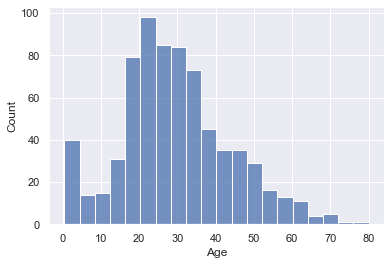

In [5]:
pd.crosstab(df['Embarked'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

# Um grupo tendo preferencia em sobreviver sobre outro
pd.crosstab(df['Sex'], df['Survived'].map({0:'Dead', 1:'Suvived'}))

df_age_dead_surv = pd.crosstab(pd.cut(df['Age'], bins = [0,2,5,10,20,30,40,50,60,70,80,90,100]), df['Survived'].map({0:'Dead', 1:'Suvived'}))

# Pessoas por idade
sns.histplot(df, x = df['Age'])

#mean_age,median_age (29.69911764705882, 28.0) -> Assimetrica a direita
mean_age = df['Age'].mean()
median_age = df['Age'].median()

df

A partir do Gráfico acima, podemos observar a distribuição assimétrica à direita referente à variável idade.

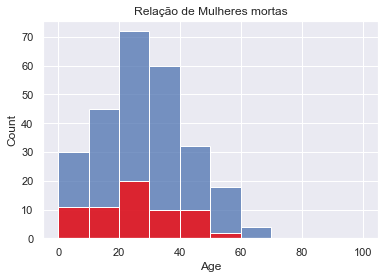

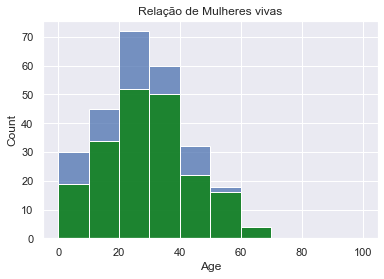

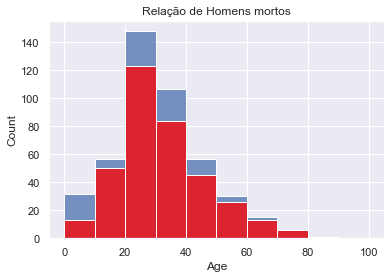

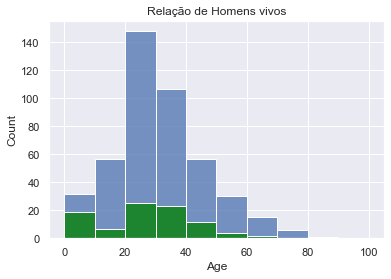

In [6]:
k = [i for i in range(0, 110,10)]

sns.histplot(df.query('Sex == "female"'), x = df.query('Sex == "female"')['Age'], bins = k)
sns.histplot(df.query('Sex == "female" and Survived == 0'), x = df.query('Sex == "female" and Survived == 0')['Age'], bins = k,color = 'red').set(title = 'Relação de Mulheres mortas')
plt.show()

sns.histplot(df.query('Sex == "female"'), x = df.query('Sex == "female"')['Age'], bins = k)
sns.histplot(df.query('Sex == "female" and Survived == 1'), x = df.query('Sex == "female" and Survived == 1')['Age'], bins = k,color = 'green').set(title = 'Relação de Mulheres vivas')
plt.show()

sns.histplot(df.query('Sex == "male"'), x = df.query('Sex == "male"')['Age'], bins = k)
sns.histplot(df.query('Sex == "male" and Survived == 0'), x = df.query('Sex == "male" and Survived == 0')['Age'], bins = k, color = 'red').set(title = 'Relação de Homens mortos')
plt.show()

sns.histplot(df.query('Sex == "male"'), x = df.query('Sex == "male"')['Age'], bins = k)
sns.histplot(df.query('Sex == "male" and Survived == 1'), x = df.query('Sex == "male" and Survived == 1')['Age'], bins = k, color = 'green').set(title = 'Relação de Homens vivos')
plt.show()

In [51]:
# Regra de Sturges
k = 1 + 3.3 * np.log(len(df[df['Survived'] == 1]))
k = round(k)
k

20

In [52]:
px.histogram(data_frame = df[df['Survived'] == 1], x = 'Age', y = 'Survived', color = 'Sex', 
             title = 'Distribuição dos sobreviventes por idade para ambos os sexos',
             color_discrete_map={'male': 'blue',
                                 'female': 'rgb(102,197,204)'},
             nbins = k)

In [68]:
px.histogram(data_frame = df[df['Survived'] == 0], x = 'Age', y = 'Survived', color = 'Sex', 
             title = 'Distribuição dos mortos por idade para ambos os sexos',
             color_discrete_map={'male': 'blue',
                                 'female': 'rgb(102,197,204)'},
             nbins = k)

In [35]:
# Plotly application for interactive visualization 

fig = px.sunburst(data_frame=df, # Our dataset
                  path=["Class", "Sex", "Survived2"],  # Root, Branches, Leaves
                  width=700, height=600,
                  color="Class",
                  color_discrete_map={'First Class': 'rgb(246,207,113)',
                                      'Second Class': 'rgb(248,156,116)',
                                      'Third Class': 'rgb(102,197,204)'},  # Colours (could be changed easily)
                  maxdepth=-1,
                  branchvalues='total',
                  hover_name='Class',  # Hover name for chosen column
                  hover_data={'Class': False},
                  title='Percentual de mortes dos homens e mulheres de cada classe', template='ggplot2'# Title and the template 
                  )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(font=dict(size=15))
fig.show()

C:\Users\alexa\Anaconda3\envs\Pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




q1: 20.125 (0 a 25% da pop.)
q2: 28.0 (até 50% da pop. mediana)
q3: 38.0 (até 75% da pop.)
iqr: 17.875
mínimo: -6.6875
máximo: 64.8125

qnt_outliers: 11

Outliers:       Age                                  Name
33   66.0                 Wheadon, Mr. Edward H
54   65.0        Ostby, Mr. Engelhart Cornelius
96   71.0             Goldschmidt, Mr. George B
116  70.5                  Connors, Mr. Patrick
280  65.0                      Duane, Mr. Frank
456  65.0             Millet, Mr. Francis Davis
493  71.0               Artagaveytia, Mr. Ramon
630  80.0  Barkworth, Mr. Algernon Henry Wilson
672  70.0           Mitchell, Mr. Henry Michael
745  70.0          Crosby, Capt. Edward Gifford
851  74.0                   Svensson, Mr. Johan




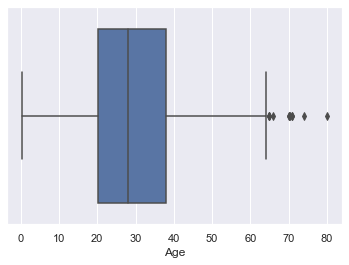

In [ ]:
titanic = df

q1 = titanic['Age'].quantile(q = 0.25)
q2 = titanic['Age'].quantile(q = 0.5)
q3 = titanic['Age'].quantile(q = 0.75)

iqr = q3 - q1 

minimo = q1 - 1.5 * iqr 
maximo = q3 + 1.5 * iqr

# outlier
num_outliers = len(titanic[titanic['Age'] > maximo])
dict_outliers = titanic[titanic['Age'] > maximo][['Age', 'Name']]

sns.boxplot(titanic['Age'])

print(f'''

q1: {q1} (0 a 25% da pop.)
q2: {q2} (até 50% da pop. mediana)
q3: {q3} (até 75% da pop.)
iqr: {iqr}
mínimo: {minimo}
máximo: {maximo}

qnt_outliers: {num_outliers}

Outliers: {dict_outliers}

''')


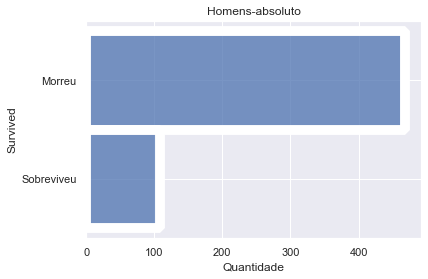

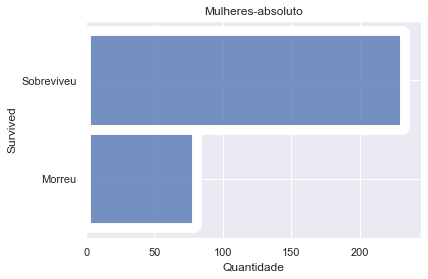

In [ ]:
# Titanic Analise dos homens e mulheres
sns.histplot(titanic.query('Sex == "male"'), y = titanic.query('Sex == "male"')['Survived'].map({1 : 'Sobreviveu', 0: 'Morreu'})).set(title = 'Homens-absoluto', xlabel = 'Quantidade')
plt.show()

sns.histplot(titanic.query('Sex == "female"'), y = titanic.query('Sex == "female"')['Survived'].map({1 : 'Sobreviveu', 0: 'Morreu'})).set(title = 'Mulheres-absoluto', xlabel = 'Quantidade')
plt.show()

,Morreu,Sobreviveu
Sex,,
female,81,233
male,468,109


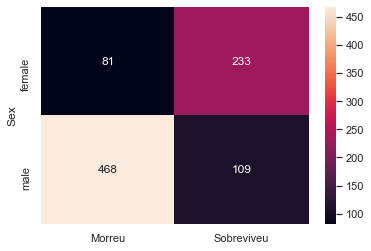

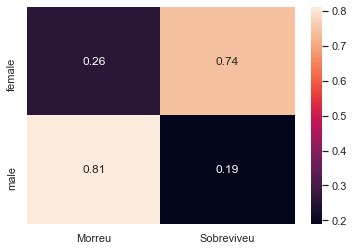

In [ ]:
df_analise_morte = pd.crosstab(titanic['Sex'], titanic['Survived'])
df_analise_morte.columns = ['Morreu' , 'Sobreviveu']

display(df_analise_morte)

sns.heatmap(df_analise_morte, annot=True , fmt = '.0f')
plt.show()

meninas_mortas = df_analise_morte['Morreu'].loc['female'] / (df_analise_morte['Morreu'].loc['female'] + df_analise_morte['Sobreviveu'].loc['female'])
meninos_mortos = df_analise_morte['Morreu'].loc['male'] / (df_analise_morte['Morreu'].loc['male'] + df_analise_morte['Sobreviveu'].loc['male'])
meninas_vivas = df_analise_morte['Sobreviveu'].loc['female'] / (df_analise_morte['Morreu'].loc['female'] + df_analise_morte['Sobreviveu'].loc['female'])
meninos_vivos = df_analise_morte['Sobreviveu'].loc['male'] / (df_analise_morte['Morreu'].loc['male'] + df_analise_morte['Sobreviveu'].loc['male'])

df_relativo = pd.DataFrame(
    data = {'Morreu': [meninas_mortas, meninos_mortos], 
    'Sobreviveu': [meninas_vivas, meninos_vivos]},
    index = ['female', 'male'])

sns.heatmap(df_relativo, annot=True )
plt.show()


### Cabin x Survived x Fare x Pclass

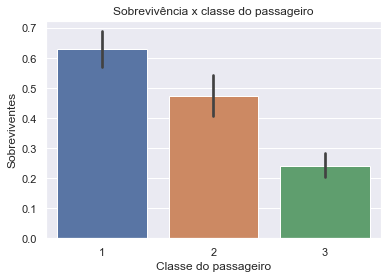

In [ ]:
# Titanic Analise dos homens e mulheres
sns.barplot(x = df['Pclass'], y = df['Survived'])
plt.title('Sobrevivência x classe do passageiro')
plt.xlabel('Classe do passageiro')
plt.ylabel('Sobreviventes')
plt.show()

sns.heatmap(pd.crosstab())

In [69]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

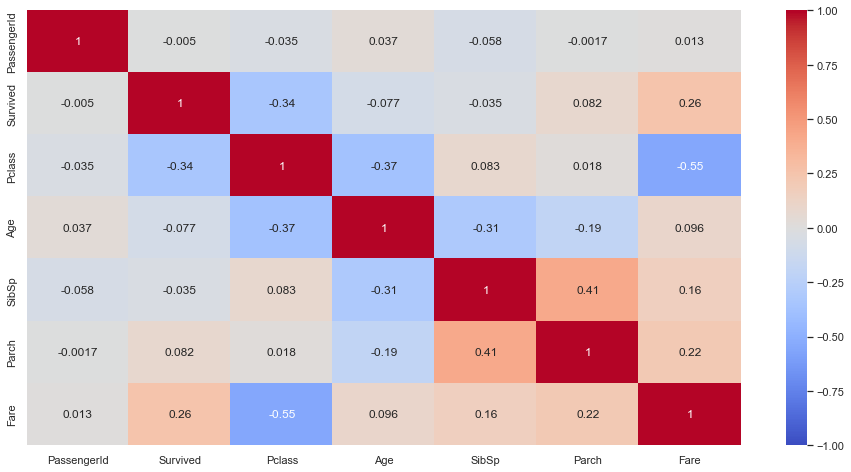

In [77]:
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),vmin = -1 , vmax = 1 , cmap='coolwarm',annot = True)

A partir do gráfico acima pode-se notar visualmente que a taxa de sobrevivência for maior para as classes menores 1 > 2 > 3

# Distribuição

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Parâmetros do Dataset

In [ ]:
n_H = 50

n_M = 50

significancia = 0.01
confianca = 1 - 0.99


